In [16]:
import pandas as pd 
import numpy as np
import torch
import h5py
print("PyTorch version:", torch.__version__)
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

PyTorch version: 2.2.1+cu121


In [17]:
path="./archive/TrainData/img/image_30.h5"
path_mask="./archive/TrainData/mask/mask_30.h5"

ls :  ['img']
<HDF5 dataset "img": shape (128, 128, 14), type "<f8">
Shape :  (128, 128, 14)


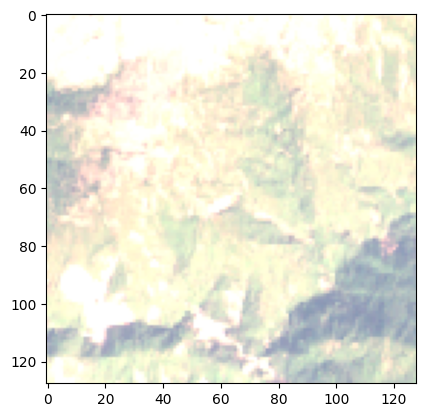

In [18]:
with h5py.File(path) as item:
    ls=list(item.keys())
    print("ls : ",ls)
    print(item.get('img'))
    data=np.array(item.get('img'))
    print("Shape : ",data.shape)
    plt.imshow(data[:,:,3:0:-1])

def ndvi(data):
    f_data=np.zeros((1,128,128,3))
    # R G B
    data_red=data[:,:,3] # 3rd one is red band
    data_green=data[:,:,2] # 2nd one is green band
    data_blue=data[:,:,1] # 1st one is blue band
    data_nir=data[:,:,7]
    data_rgb=data[:,:,3:0:-1]
    data_ndvi=np.divide(data_nir-data_red,np.add(data_nir,data_red))
    f_data[0,:,:,0]=data_ndvi
    f_data[0,:,:,1]=data[:,:,12]
    f_data[0,:,:,2]=data[:,:,13]
    print("NDVI shape: ",data_ndvi.shape,"f_data shape :",f_data.shape)
    plt.imshow(data_ndvi)

NDVI shape:  (128, 128) f_data shape : (1, 128, 128, 3)


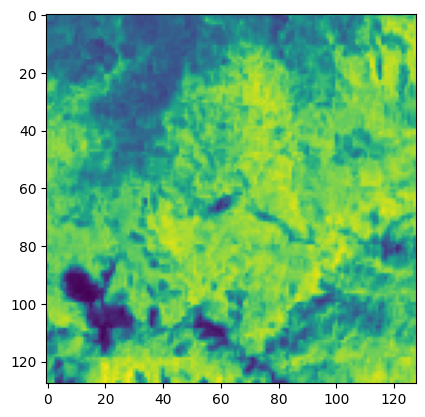

In [4]:
ndvi(data)

ls :  ['mask']
<HDF5 dataset "mask": shape (128, 128), type "|u1">
Shape :  (128, 128)


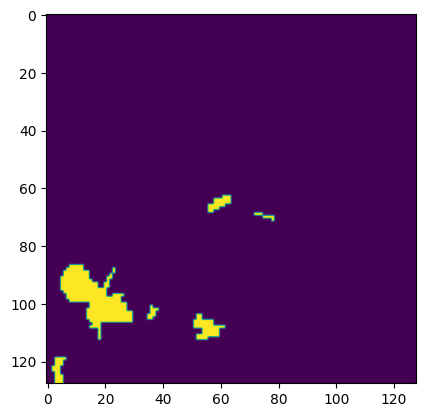

In [5]:
with h5py.File(path_mask) as item: # yellow denotes landslides 
    ls=list(item.keys())
    print("ls : ",ls)
    print(item.get('mask'))
    data2=np.array(item.get('mask'))
    print("Shape : ",data2.shape)
    plt.imshow(data2)

In [6]:
train_features="./archive/TrainData/img/*.h5"
train_labels="./archive/TrainData/mask/*.h5"
train_xx=np.zeros((3799,128,128,6)) # 3799 img and mask
train_yy=np.zeros((3799,128,128,1))

X=sorted(glob.glob(train_features))
Y=sorted(glob.glob(train_labels))

In [47]:
tf.test.gpu_device_name()

''

In [7]:
for i,(img,mask) in enumerate(zip(X,Y)):
    print(i,img,mask)
    with h5py.File(img) as input:
        ls=list(input.keys())
        data=np.array(input.get('img'))
        # assigning for nan value
        data[np.isnan(data)]=0.000001
        # normalize data
        mid_rgb=data[:,:,1:4].max()/2.0
        mid_slope=data[:,:,12].max()/2.0
        mid_elevation=data[:,:,13].max()/2.0

        # ndvi calculations
        data_red=data[:,:,3]
        data_nir=data[:,:,7]
        data_ndvi=np.divide(data_nir-data_red,np.add(data_red,data_nir))

        # adding to the final array
        train_xx[i,:,:,0]=1-data[:,:,3]/mid_rgb # red
        train_xx[i,:,:,1]=1-data[:,:,2]/mid_rgb # green
        train_xx[i,:,:,2]=1-data[:,:,1]/mid_rgb # blue
        train_xx[i,:,:,3]=data_ndvi # ndvi
        train_xx[i,:,:,4]=1-data[:,:,12]/mid_slope # slope
        train_xx[i,:,:,5]=1-data[:,:,13]/mid_elevation # elevation
    with h5py.File(mask) as label:
        ls2=list(label.keys())
        data2=np.array(label.get('mask'))
        train_yy[i,:,:,0]=data2

0 ./archive/TrainData/img\image_1.h5 ./archive/TrainData/mask\mask_1.h5
1 ./archive/TrainData/img\image_10.h5 ./archive/TrainData/mask\mask_10.h5
2 ./archive/TrainData/img\image_100.h5 ./archive/TrainData/mask\mask_100.h5
3 ./archive/TrainData/img\image_1000.h5 ./archive/TrainData/mask\mask_1000.h5
4 ./archive/TrainData/img\image_1001.h5 ./archive/TrainData/mask\mask_1001.h5
5 ./archive/TrainData/img\image_1002.h5 ./archive/TrainData/mask\mask_1002.h5
6 ./archive/TrainData/img\image_1003.h5 ./archive/TrainData/mask\mask_1003.h5
7 ./archive/TrainData/img\image_1004.h5 ./archive/TrainData/mask\mask_1004.h5
8 ./archive/TrainData/img\image_1005.h5 ./archive/TrainData/mask\mask_1005.h5
9 ./archive/TrainData/img\image_1006.h5 ./archive/TrainData/mask\mask_1006.h5
10 ./archive/TrainData/img\image_1007.h5 ./archive/TrainData/mask\mask_1007.h5
11 ./archive/TrainData/img\image_1008.h5 ./archive/TrainData/mask\mask_1008.h5
12 ./archive/TrainData/img\image_1009.h5 ./archive/TrainData/mask\mask_100

C:\Users\tamal\AppData\Local\Temp\ipykernel_10684\1348750744.py:23: RuntimeWarning: invalid value encountered in divide
  train_xx[i,:,:,4]=1-data[:,:,12]/mid_slope # slope


1678 ./archive/TrainData/img\image_2509.h5 ./archive/TrainData/mask\mask_2509.h5
1679 ./archive/TrainData/img\image_251.h5 ./archive/TrainData/mask\mask_251.h5
1680 ./archive/TrainData/img\image_2510.h5 ./archive/TrainData/mask\mask_2510.h5
1681 ./archive/TrainData/img\image_2511.h5 ./archive/TrainData/mask\mask_2511.h5
1682 ./archive/TrainData/img\image_2512.h5 ./archive/TrainData/mask\mask_2512.h5
1683 ./archive/TrainData/img\image_2513.h5 ./archive/TrainData/mask\mask_2513.h5
1684 ./archive/TrainData/img\image_2514.h5 ./archive/TrainData/mask\mask_2514.h5
1685 ./archive/TrainData/img\image_2515.h5 ./archive/TrainData/mask\mask_2515.h5
1686 ./archive/TrainData/img\image_2516.h5 ./archive/TrainData/mask\mask_2516.h5
1687 ./archive/TrainData/img\image_2517.h5 ./archive/TrainData/mask\mask_2517.h5
1688 ./archive/TrainData/img\image_2518.h5 ./archive/TrainData/mask\mask_2518.h5
1689 ./archive/TrainData/img\image_2519.h5 ./archive/TrainData/mask\mask_2519.h5
1690 ./archive/TrainData/img\i

C:\Users\tamal\AppData\Local\Temp\ipykernel_10684\1348750744.py:16: RuntimeWarning: invalid value encountered in divide
  data_ndvi=np.divide(data_nir-data_red,np.add(data_red,data_nir))


2267 ./archive/TrainData/img\image_3039.h5 ./archive/TrainData/mask\mask_3039.h5
2268 ./archive/TrainData/img\image_304.h5 ./archive/TrainData/mask\mask_304.h5
2269 ./archive/TrainData/img\image_3040.h5 ./archive/TrainData/mask\mask_3040.h5
2270 ./archive/TrainData/img\image_3041.h5 ./archive/TrainData/mask\mask_3041.h5
2271 ./archive/TrainData/img\image_3042.h5 ./archive/TrainData/mask\mask_3042.h5
2272 ./archive/TrainData/img\image_3043.h5 ./archive/TrainData/mask\mask_3043.h5
2273 ./archive/TrainData/img\image_3044.h5 ./archive/TrainData/mask\mask_3044.h5
2274 ./archive/TrainData/img\image_3045.h5 ./archive/TrainData/mask\mask_3045.h5
2275 ./archive/TrainData/img\image_3046.h5 ./archive/TrainData/mask\mask_3046.h5
2276 ./archive/TrainData/img\image_3047.h5 ./archive/TrainData/mask\mask_3047.h5
2277 ./archive/TrainData/img\image_3048.h5 ./archive/TrainData/mask\mask_3048.h5
2278 ./archive/TrainData/img\image_3049.h5 ./archive/TrainData/mask\mask_3049.h5
2279 ./archive/TrainData/img\i

In [49]:
train_xx[np.isnan(train_xx)]=0.000001
print(train_xx.min(),train_xx.max(),train_yy.min(),train_yy.max())

-1.0 1.0 0.0 1.0


In [50]:
def dice_loss(y_true,y_pred): # dice loss function
    y_true=tf.cast(y_true,tf.float32)
    y_pred=tf.math.sigmoid(y_pred)
    numerator=2*tf.reduce_sum(y_true*y_pred)
    denominator=tf.reduce_sum(y_true*y_pred)

    return 1- numerator/denominator

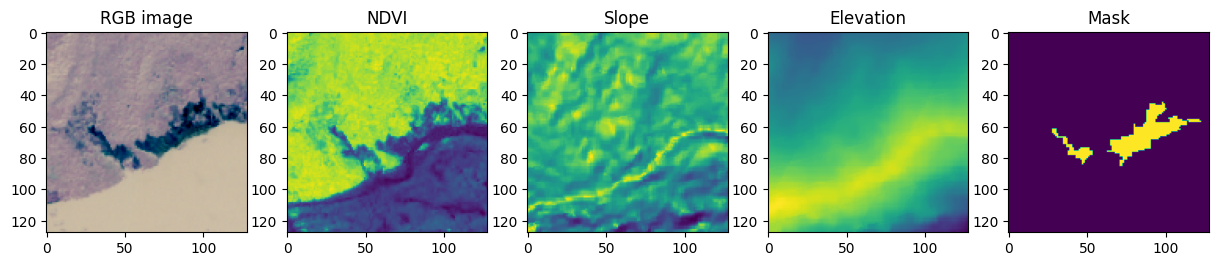

In [51]:
# visualization of training data
img=232
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(train_xx[img,:,:,0:3]) # RGB image
ax2.imshow(train_xx[img,:,:,3]) # NDVI
ax3.imshow(train_xx[img,:,:,4]) # Slope
ax4.imshow(train_xx[img,:,:,5]) # Elevation
ax5.imshow(train_yy[img,:,:,0]) # Mask

In [52]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(train_xx,train_yy,test_size=0.2)

In [53]:

def m_recall(y_true,y_pred): 
    true_positive=K.sum(K.round(K.clip(y_true*y_pred,0,1)))   
    possible_positive=K.sum(K.round(K.clip(y_true,0,1)))
    my_reccall=true_positive/(possible_positive+K.epsilon())
    return my_reccall
def m_precision(y_true,y_pred):
    true_positive=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    predicted_positive=K.sum(K.round(K.clip(y_pred,0,1)))
    precision_=true_positive/(predicted_positive+K.epsilon())
def m_f1_score(y_true,y_pred):
    precision_=precision(y_true,y_pred)
    recall_=recall(y_true,y_pred)
    return 2*precision_ *recall_/(precision_+recall_+K.epsilon())

In [54]:
# tf.keras.backend.epsilon() = e^-7 used to avoid x/0 errors
print(tf.keras.backend.epsilon())
from sklearn.metrics import precision_score, recall_score

# Define precision and recall functions using instantiated metrics objects
true_positives_metric = tf.keras.metrics.TruePositives()
false_positives_metric = tf.keras.metrics.FalsePositives()
false_negatives_metric = tf.keras.metrics.FalseNegatives()

def precision(y_true, y_pred):
    true_positives = true_positives_metric(y_true, y_pred)
    false_positives = false_positives_metric(y_true, y_pred)
    return true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())

def recall(y_true, y_pred):
    true_positives = true_positives_metric(y_true, y_pred)
    false_negatives = false_negatives_metric(y_true, y_pred)
    return true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * prec * rec / (prec + rec + tf.keras.backend.epsilon())


# def precision(y_true, y_pred): #Of all the instances predicted as positive, how many were actually positive?
#     true_positives = true_positives_metric()(y_true, y_pred) # pred=+ve & pred=True
#     false_positives = false_positives_metric()(y_true, y_pred)# pred=+ve & pred=False
#     return true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())

# def recall(y_true, y_pred): # sensitivity / Of all the actual positive instances, how many did the model correctly identify?
#     true_positives = true_positives_metric()(y_true, y_pred) # pred=+ve & pred=True 
#     false_negatives = false_negatives_metric()(y_true, y_pred)# pred=-ve & pred=False
#     # missing positive instances 
#     return true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())
# def f1_score(y_true, y_pred):# By taking the harmonic mean, the F1 score gives more weight to lower values. This means that the F1 score will be high only if both precision and recall are high.
#     prec,rec=precision(y_true, y_pred),recall(y_true, y_pred)
#     return 2*prec*rec/(prec+rec+tf.keras.backend.epsilon())

1e-07


In [56]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    #input layer
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path

    # Convolutional Layers : These layers perform convolution operations on the input data. They learn spatial hierarchies of features from the input images.
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    # Dropout Layers :  Dropout layers randomly set a fraction of input units to 0 during training, which helps prevent overfitting by introducing noise and reducing interdependence between units.
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    # MaxPooling Layers : MaxPooling layers reduce the spatial dimensions of the feature maps by taking the maximum value within a defined window. This helps in reducing computational complexity and controlling overfitting by reducing the number of parameters.
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 

    #Conv2DTranspose Layers (u6-u9): These layers perform upscaling of the feature maps, allowing the network to learn to upsample the feature maps to match the original input dimensions.
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    #Concatenate Layers (after u6-u9): These layers concatenate the upsampled feature maps with the corresponding feature maps from the contraction path. This helps in preserving spatial information and details lost during the downsampling process.
    u6 = tf.keras.layers.concatenate([u6, c4])
    #Convolutional Layers (c6-c9): These layers perform convolution operations on the concatenated feature maps. They help in learning high-level features and refining the segmentation results.
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    #Dropout Layers (after c6-c9): Similar to the dropout layers in the contraction path, these layers help prevent overfitting by introducing randomness during training.
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    # Output Layer:

    #Conv2D Layer (outputs): This layer applies a final convolution operation to generate the output segmentation map. The activation function used is sigmoid, which outputs a probability value between 0 and 1 for each pixel, representing the likelihood of that pixel belonging to the target class ( landslide or not).
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score, precision, recall])
    
    return model

model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("model_epoch_10.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

callbacks = [
    # earlyStopping,
    checkpointer
    ]
y_train_reshaped = np.squeeze(y_train, axis=-1)
history = model.fit(x_train, y_train_reshaped, batch_size=32,  
          epochs=10, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_epoch_10.h5")


Epoch 1/10
95/95 - 78s - 823ms/step - accuracy: 0.9677 - f1_score: 0.4187 - loss: 0.1154 - precision: 0.5270 - recall: 0.3486 - val_accuracy: 0.9763 - val_f1_score: 0.3505 - val_loss: 0.0537 - val_precision: 0.5257 - val_recall: 0.2624
Epoch 2/10
95/95 - 63s - 661ms/step - accuracy: 0.9789 - f1_score: 0.3261 - loss: 0.0509 - precision: 0.5420 - recall: 0.2335 - val_accuracy: 0.9805 - val_f1_score: 0.3889 - val_loss: 0.0499 - val_precision: 0.6048 - val_recall: 0.2877
Epoch 3/10
95/95 - 61s - 637ms/step - accuracy: 0.9833 - f1_score: 0.4617 - loss: 0.0461 - precision: 0.6575 - recall: 0.3566 - val_accuracy: 0.9816 - val_f1_score: 0.5168 - val_loss: 0.0480 - val_precision: 0.6930 - val_recall: 0.4127
Epoch 4/10
95/95 - 97s - 1s/step - accuracy: 0.9841 - f1_score: 0.5555 - loss: 0.0435 - precision: 0.7172 - recall: 0.4536 - val_accuracy: 0.9848 - val_f1_score: 0.5793 - val_loss: 0.0405 - val_precision: 0.7346 - val_recall: 0.4785
Epoch 5/10
95/95 - 82s - 858ms/step - accuracy: 0.9847 - f1

In [ ]:
x_train.shape,y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [57]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.0372236892580986 0.9860276579856873 0.7111374735832214 0.8190613389015198 0.6284368634223938


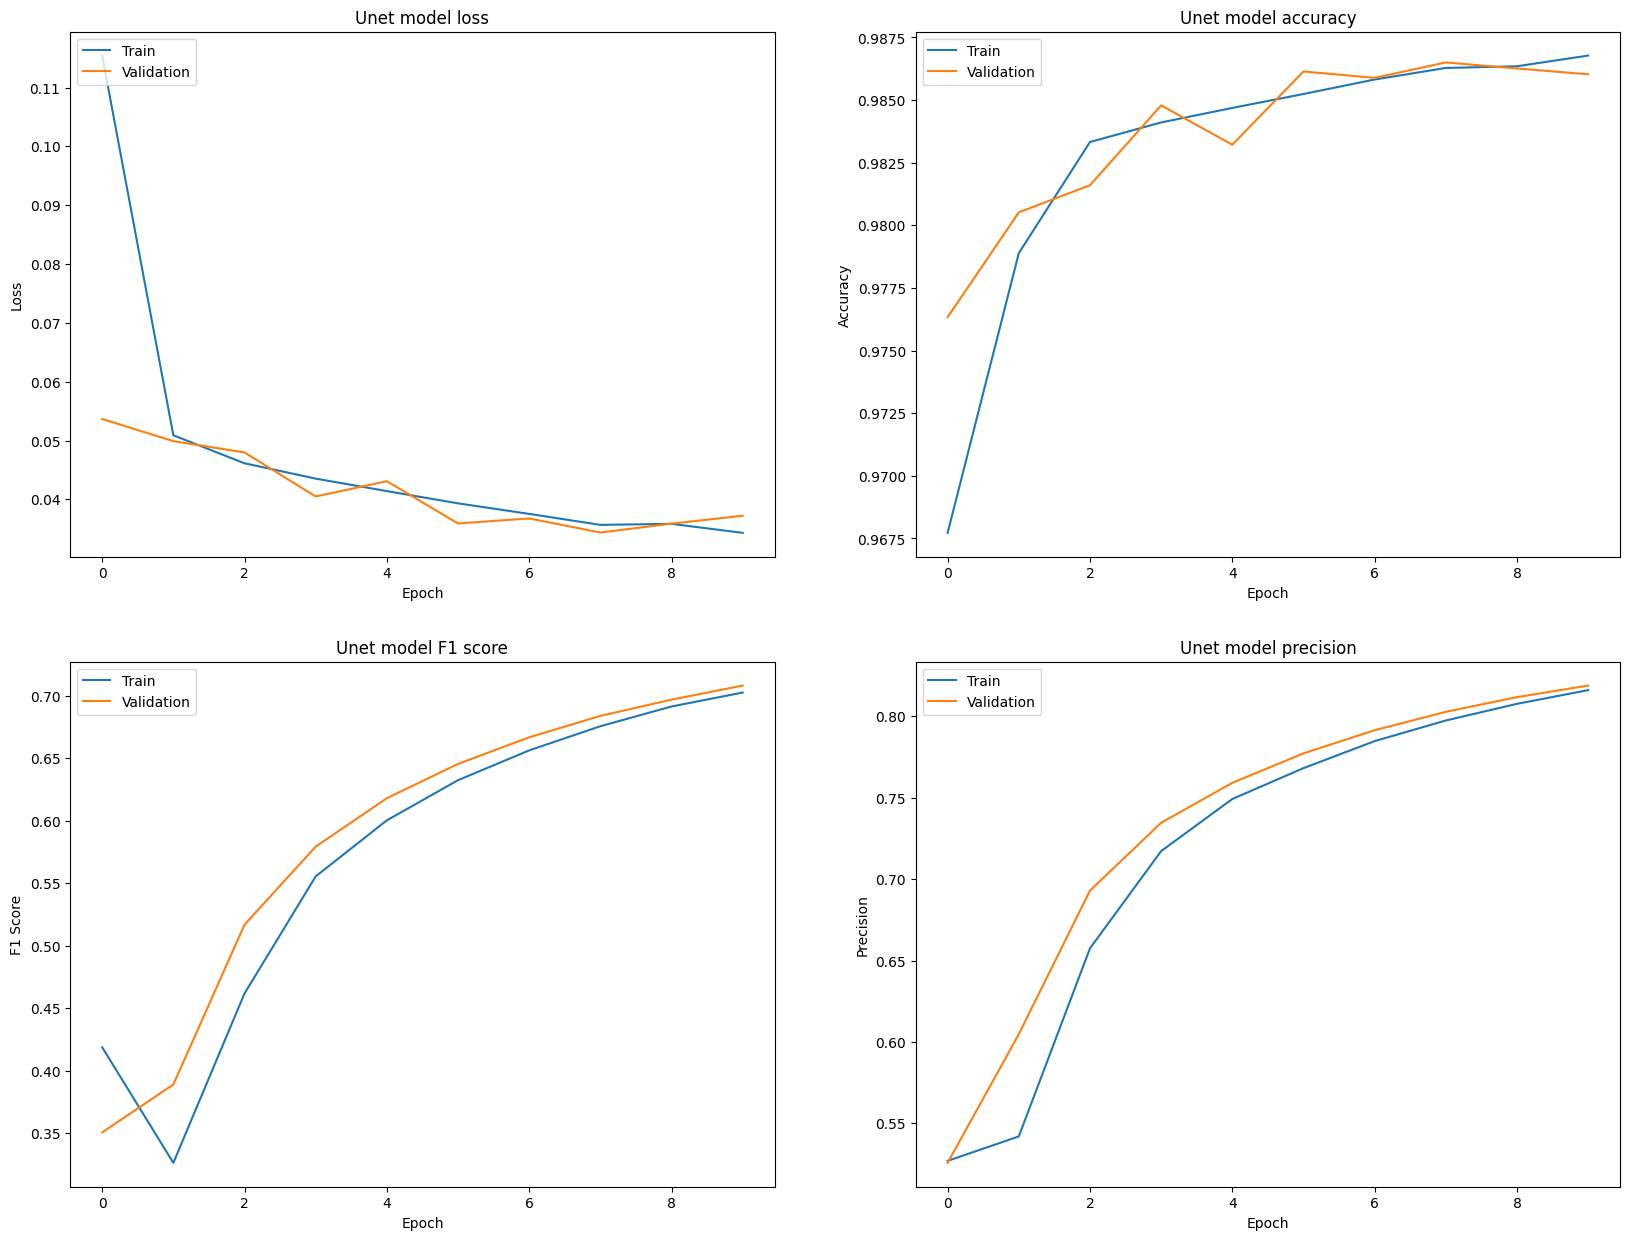

In [58]:
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))

ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.set_title('Unet model loss')
ax11.set_ylabel('Loss')
ax11.set_xlabel('Epoch')
ax11.legend(['Train', 'Validation'], loc='upper left')

ax12.plot(history.history['accuracy'])
ax12.plot(history.history['val_accuracy'])
ax12.set_title('Unet model accuracy')
ax12.set_ylabel('Accuracy')
ax12.set_xlabel('Epoch')
ax12.legend(['Train', 'Validation'], loc='upper left')

ax13.plot(history.history['f1_score'])
ax13.plot(history.history['val_f1_score'])
ax13.set_title('Unet model F1 score')
ax13.set_ylabel('F1 Score')
ax13.set_xlabel('Epoch')
ax13.legend(['Train', 'Validation'], loc='upper left')

ax14.plot(history.history['precision'])
ax14.plot(history.history['val_precision'])
ax14.set_title('Unet model precision')
ax14.set_ylabel('Precision')
ax14.set_xlabel('Epoch')
ax14.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
model2 = tf.keras.models.load_model("./model_save_100.h5")


In [15]:
threshold = 0.5
img = 120

pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

NameError: name 'model' is not defined

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


Text(0.5, 1.0, 'Training Image')

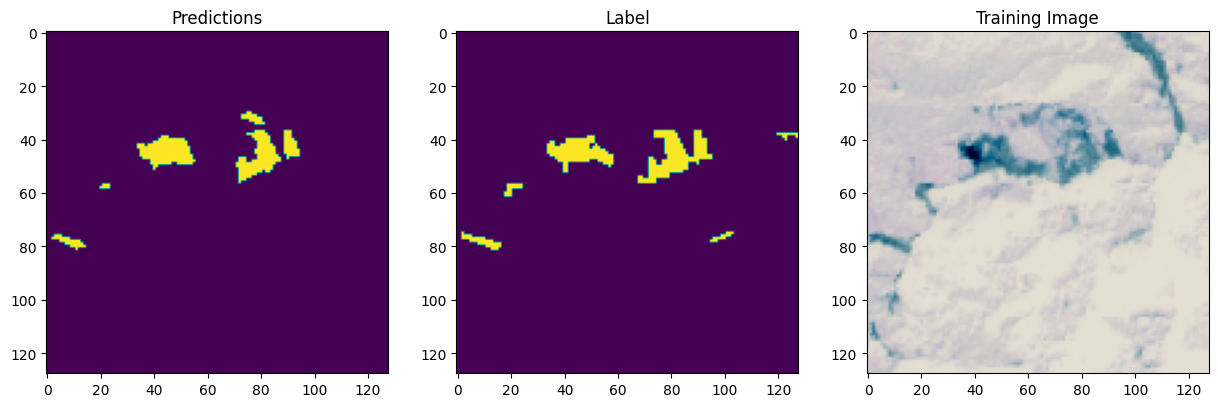

In [76]:
pred_img = model2.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step


Text(0.5, 1.0, 'Training Image')

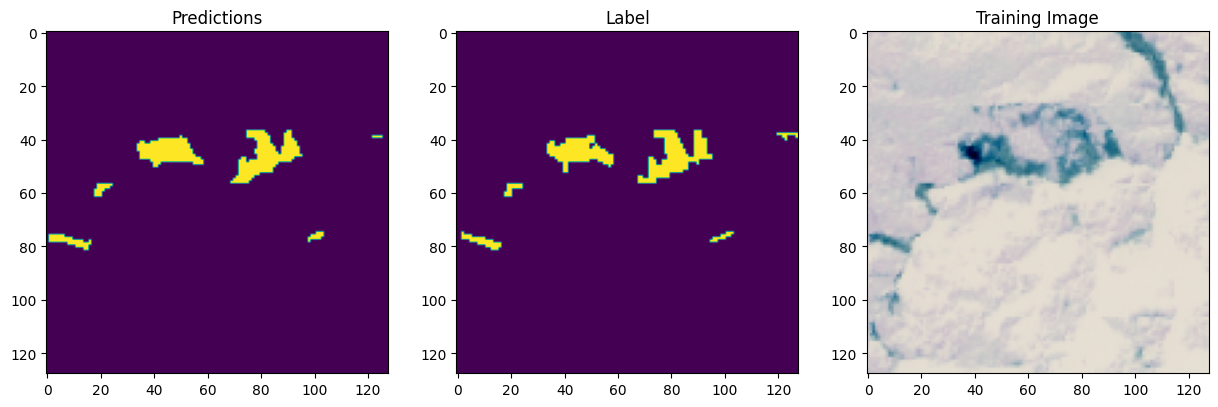

In [77]:
model3 = tf.keras.models.load_model("./model_epoch_160_valf1m0_0001_89%.h5")
pred_img = model3.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [ ]:
# validation
validation_url = './archive/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 ./archive/ValidData/img\image_1.h5
1 ./archive/ValidData/img\image_10.h5
2 ./archive/ValidData/img\image_100.h5
3 ./archive/ValidData/img\image_101.h5
4 ./archive/ValidData/img\image_102.h5
5 ./archive/ValidData/img\image_103.h5
6 ./archive/ValidData/img\image_104.h5
7 ./archive/ValidData/img\image_105.h5
8 ./archive/ValidData/img\image_106.h5
9 ./archive/ValidData/img\image_107.h5
10 ./archive/ValidData/img\image_108.h5
11 ./archive/ValidData/img\image_109.h5
12 ./archive/ValidData/img\image_11.h5
13 ./archive/ValidData/img\image_110.h5
14 ./archive/ValidData/img\image_111.h5
15 ./archive/ValidData/img\image_112.h5
16 ./archive/ValidData/img\image_113.h5
17 ./archive/ValidData/img\image_114.h5
18 ./archive/ValidData/img\image_115.h5
19 ./archive/ValidData/img\image_116.h5
20 ./archive/ValidData/img\image_117.h5
21 ./archive/ValidData/img\image_118.h5
22 ./archive/ValidData/img\image_119.h5
23 ./archive/ValidData/img\image_12.h5
24 ./archive/ValidData/img\image_120.h5
25 ./archive/Va

C:\Users\tamal\AppData\Local\Temp\ipykernel_3284\1037992249.py:25: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


222 ./archive/ValidData/img\image_79.h5
223 ./archive/ValidData/img\image_8.h5
224 ./archive/ValidData/img\image_80.h5
225 ./archive/ValidData/img\image_81.h5
226 ./archive/ValidData/img\image_82.h5
227 ./archive/ValidData/img\image_83.h5
228 ./archive/ValidData/img\image_84.h5
229 ./archive/ValidData/img\image_85.h5
230 ./archive/ValidData/img\image_86.h5
231 ./archive/ValidData/img\image_87.h5
232 ./archive/ValidData/img\image_88.h5
233 ./archive/ValidData/img\image_89.h5
234 ./archive/ValidData/img\image_9.h5
235 ./archive/ValidData/img\image_90.h5
236 ./archive/ValidData/img\image_91.h5
237 ./archive/ValidData/img\image_92.h5
238 ./archive/ValidData/img\image_93.h5
239 ./archive/ValidData/img\image_94.h5
240 ./archive/ValidData/img\image_95.h5
241 ./archive/ValidData/img\image_96.h5
242 ./archive/ValidData/img\image_97.h5
243 ./archive/ValidData/img\image_98.h5
244 ./archive/ValidData/img\image_99.h5


In [ ]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

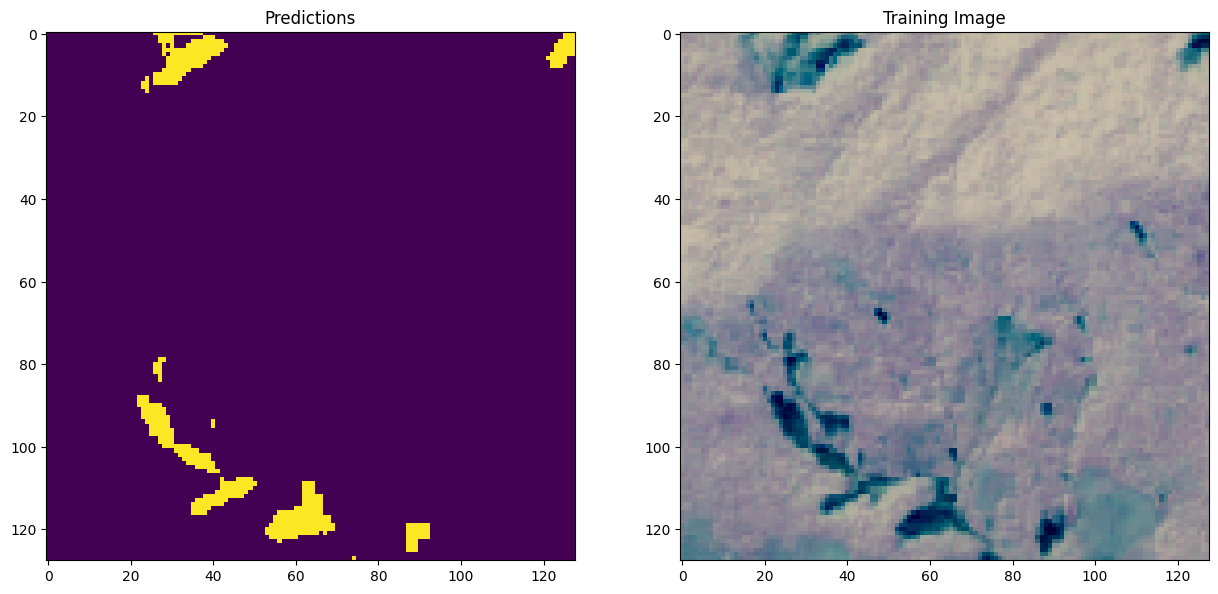

In [ ]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [ ]:
write_directory = './res_final'
for i, name in enumerate(mask_name):
  name=name[4:]
  # print(name)
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()